In [83]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms

import os 
from shutil import copy2
from tqdm import tqdm_notebook as tqdm
import math

from PIL import Image
import matplotlib.pyplot as plt
# Any results you write to the current directory are saved as output.

In [84]:
root="../input/assignment2/training/frames/"
print(os.listdir(root))

['lec8', 'lec4', 'lec7', 'lec31', 'lec17', 'lec15', 'lec20', 'lec5', 'lec25', 'lec35', 'lec19', 'lec1', 'lec21', 'lec30', 'lec29', 'lec16', 'lec9', 'lec12', 'lec14', 'lec6', 'lec23', 'lec18', 'lec32', 'lec22', 'lec2', 'lec33', 'lec11', 'lec34', 'lec26', 'lec27', 'lec28', 'lec3', 'lec13', 'lec24', 'lec10']


In [ ]:
#defining the first convolutional network without panaroma

class ConvNet1(nn.Module):
    def __init__(self,num_of_classes=2):
        super(ConvNet1,self).__init__()
        
        self.layer1a=nn.Sequential(
                    nn.Conv2d(3,16,kernel_size=5,stride=2), #118,158,16
                    nn.BatchNorm2d(16),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2,stride=2)) #59,79,16 
        self.layer2a=nn.Sequential(
                    nn.Conv2d(16,32,kernel_size=3,stride=2),  #29,39,32
                    nn.BatchNorm2d(32),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2,stride=2)) #14,19,32
        self.layer3a=nn.Sequential(
                    nn.Conv2d(32,8,kernel_size=3,stride=2) #6,9,8
                    nn.BatchNorm2d(8),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=3,stride=2))#3,4,8
        
        self.layer2a=nn.Sequential(
                    nn.Conv2d(3,16,kernel_size=5,stride=3), #79,532,16
                    nn.BatchNorm2d(16),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2,stride=1)) #78,531,16
        self.layer2b=nn.Sequential(
                    nn.Conv2d(16,32,kernel_size=7,stride=4,padding=20), #28,142,32
                    nn.BatchNorm2d(32),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2,stride=2)) #13,70,32
        self.layer3b=nn.Sequential(
                    nn.Conv2d(32,8,kernel_size=5,stride=4,#padding=10) #8,22,8 
                    nn.BatchNorm2d(8),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=3,stride=2))# BT in getting the same size :p
        
        self.fc1=nn.Linear(,num_of_classes) #2 is the number of classes
        
        
        def forward(x):
            _x=x[641:961,:,:]
            
            out1=self.layer1a(_x)  #240,320,3
            out1=self.layer2(out1)
            out1=self.layer3(out1)
            
            out2=self.layer2a(x)
            out2=self.layer2b(out2)
            out2=self.layer2c(out2)
            
            out=np.concatenate((out1,out2),axis=2)
            
            return out


In [90]:
root2="../input/annotated-data/annotated/"
print(os.listdir(root2))

['copied', 'copied_labels']


In [86]:
loc_xdata=root2+"copied/"
loc_ydata=root2+"copied_labels/"

In [91]:
os.listdir(loc_xdata)
os.listdir(loc_xdata+os.listdir(loc_xdata)[0])

['l26s00243.jpg',
 'l26s00245.jpg',
 'l26s00241.jpg',
 'l26s00242.jpg',
 'l26s00244.jpg']

In [92]:
#function to merge the images given the folder

def Merge_Image(images_path):
    im1=np.asarray(Image.open(images_path+os.listdir(images_path)[0]).resize((320, 240), Image.ANTIALIAS))
    for i in range(len(os.listdir(images_path))-1):
        im2=np.asarray(Image.open(images_path+os.listdir(images_path)[i+1]).resize((320, 240), Image.ANTIALIAS))
        #print("im2:"+str(im2.shape))
        im1=np.concatenate((im1,im2),axis=1)
        #print("im1:"+str(im1.shape))
    
    print(im1.shape)
    return im1 #required panaroma view 
    
    

(240, 1600, 3)


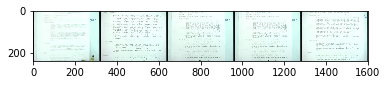

In [93]:
t=Merge_Image("../input/annotated-data/annotated/copied/1/")
t.shape
plt.imshow(t)

In [94]:
#loading the data
x_data=[]
y_data=np.array([])
for i in tqdm(range(len(os.listdir(loc_xdata)))):
        #function to return the merged images
        fname=os.listdir(loc_xdata)[i]
        path=loc_xdata+fname+"/"
        X_merged=Merge_Image(path)
        x_data.append(X_merged)
    
        asso_y=np.load(loc_ydata+fname+".npy")
        y_data=np.append(y_data,asso_y[2]) #taking the middle value out of all 

(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600

(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600

(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600

(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600

(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600

(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600

(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600

(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600

(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600

(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600

(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600, 3)
(240, 1600

In [95]:
from sklearn.model_selection import train_test_split
x_data=np.array(x_data)

X_train, X_test, y_train, y_test = train_test_split(
     x_data, y_data, test_size=0.33, random_state=42)

In [98]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3913, 240, 1600, 3)
(1928, 240, 1600, 3)
(3913,)
(1928,)


In [ ]:
 #Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 20
num_classes = 2
batch_size = 100
learning_rate = 0.001

x_dataset=torch.from_numpy(X_train)
y_dataset=torch.from_numpy(y_train)

x_testset=torch.from_numpy(X_test)
y_testset=torch.from_numpy(y_test)

In [ ]:
model = ConvNet(2).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')